In [1]:
import pandas as pd
import os

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def extract_data(filepath): 
#Extract the data from a single simulation output 
    # print(filepath)
    data=pd.read_excel(filepath, skiprows=[0,1,2], index_col=0) #skip the first 3 rows of the file, set the first column as the index column
     

    # drop first three columns 
    # these are the empty "format" column, the units column, and the initial configuration, which we don't care about
    # (remember the original first column is the index column now, so it doesn't get dropped)
    data.drop(data.columns[0:3], axis=1, inplace=True) 
    
    data = data.transpose() #transpose the data so that the columns are the variables and the rows are the data points
    return data 

In [4]:
def extract_data_2(filepath): 
#Extract the data from a single simulation output 
    # print(filepath)
    data=pd.read_excel(filepath, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], index_col=0) #skip the first 3 rows of the file, set the first column as the index column
     

    # drop first three columns 
    # these are the empty "format" column, the units column, and the initial configuration, which we don't care about
    # (remember the original first column is the index column now, so it doesn't get dropped)
    data.drop(data.columns[0:3], axis=1, inplace=True) 
    
    data = data.transpose() #transpose the data so that the columns are the variables and the rows are the data points
    return data 

In [5]:
from sklearn.model_selection import train_test_split

## Displacement

In [85]:
filepath = "C:/Users/ankur/OneDrive/Documents/Solidworks Config generations and Results 30% REAL/Configs and results 2 30%/results 2 30%/new filetype" #path to the folder containing the files
filenames = os.listdir(filepath)
all_data = [] #list to store the data from all the files
for f in filenames:
    if f.endswith(".xlsx"):
        print(f"Loading file: {f}")
        data = extract_data(f"{filepath}/{f}") #format the exact path using the folder path + / + the file name
        all_data.append(data) #append the data to the list of all data
all_data = pd.concat(all_data, axis = 0) #concatenate all the data into a single dataframe

all_data.index = range(len(all_data)) #rename indices to avoid issues with duplicates
all_data


Loading file: 1001-2000 2 30% new.xlsx
Loading file: 2001-3000 2 30% new.xlsx
Loading file: 3001-4000 2 30% new.xlsx
Loading file: 4001-5000 2 30% new.xlsx


,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Displacement4,Stress4,Mass3
0,19.91868,33.22566,40.69056,35.22798,16.94894,24.05912,31.23588,-2.126,21.04,93.38
1,22.88962,23.19807,44.83895,56.28082,12.26751,17.76598,29.86856,-2.730,25.51,82.86
2,55.95612,39.33677,42.01864,47.40645,10.56435,18.35673,17.14532,-2.425,24.84,75.54
3,26.00999,30.22451,44.61681,50.36019,12.88949,16.78163,30.71649,-2.486,22.76,84.62
4,28.13147,42.88168,31.00824,30.83574,11.02044,14.81101,32.82180,-2.325,25.12,93.57
...,...,...,...,...,...,...,...,...,...,...
3999,57.82514,23.72746,48.17943,44.96533,16.15271,14.67983,15.69500,-2.343,25.96,76.55
4000,31.70644,40.66130,39.15084,34.52286,17.14512,15.52482,24.71420,-2.190,23.30,89.95
4001,42.75364,38.62500,45.55592,37.52035,15.80579,14.68691,18.05290,-2.238,23.80,84.06
4002,29.12727,43.91183,26.55352,28.04726,14.68081,19.16128,31.45083,-2.181,22.43,94.83


In [86]:
filepath = "C:/Users/ankur/OneDrive/Documents/Solidworks Config generations and Results 30% REAL/Configs and results 2 30%/results 2 30%" #path to the folder containing the files
filenames = os.listdir(filepath)
for f in filenames:
    if f.endswith(".xlsx"):
        print(f"Loading file: {f}")
        data2 = extract_data_2(f"{filepath}/{f}") #format the exact path using the folder path + / + the file name

data2.index = range(len(data2)) #rename indices to avoid issues with duplicates
data2

Loading file: 1-1000 2 30% new.xlsx


,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Displacement4,Stress4,Mass3
0,24.491,25.006,40.098,48.642,17.364,28.583,19.487,-2.235,20.86,87.86
1,46.517,40.561,46.414,29.929,15.165,14.735,17.321,-2.234,24.15,84.80
2,60.395,37.660,32.578,32.534,16.704,15.820,25.363,-2.232,26.18,82.56
3,23.707,47.396,42.834,46.807,15.066,19.449,15.389,-2.394,22.93,84.13
4,49.251,55.232,44.403,35.188,11.330,21.026,20.971,-2.380,24.13,79.06
...,...,...,...,...,...,...,...,...,...,...
997,49.047,37.688,49.817,41.180,10.437,15.375,20.170,-2.449,24.38,79.12
998,56.645,52.973,40.194,30.472,11.161,11.776,25.684,-2.459,26.12,79.54
999,36.845,36.266,42.681,45.959,10.230,25.635,20.098,-2.322,22.71,83.52
1000,45.694,32.769,37.213,34.407,13.690,28.109,19.403,-2.097,23.17,87.58


In [17]:
data2 = data2.drop([1001])
data2

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Displacement4,Stress4,Mass3
0,24.491,25.006,40.098,48.642,17.364,28.583,19.487,-2.235,20.86,87.86
1,46.517,40.561,46.414,29.929,15.165,14.735,17.321,-2.234,24.15,84.80
2,60.395,37.660,32.578,32.534,16.704,15.820,25.363,-2.232,26.18,82.56
3,23.707,47.396,42.834,46.807,15.066,19.449,15.389,-2.394,22.93,84.13
4,49.251,55.232,44.403,35.188,11.330,21.026,20.971,-2.380,24.13,79.06
...,...,...,...,...,...,...,...,...,...,...
996,64.840,38.633,32.655,40.408,13.363,14.928,17.551,-2.365,30.06,77.29
997,49.047,37.688,49.817,41.180,10.437,15.375,20.170,-2.449,24.38,79.12
998,56.645,52.973,40.194,30.472,11.161,11.776,25.684,-2.459,26.12,79.54
999,36.845,36.266,42.681,45.959,10.230,25.635,20.098,-2.322,22.71,83.52


In [18]:
all_data = pd.concat([all_data, data2], axis = 0) #concatenate all the data into a single dataframe

all_data.index = range(len(all_data)) #rename indices to avoid issues with duplicates
all_data

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Displacement4,Stress4,Mass3
0,19.91868,33.22566,40.69056,35.22798,16.94894,24.05912,31.23588,-2.126,21.04,93.38
1,22.88962,23.19807,44.83895,56.28082,12.26751,17.76598,29.86856,-2.730,25.51,82.86
2,55.95612,39.33677,42.01864,47.40645,10.56435,18.35673,17.14532,-2.425,24.84,75.54
3,26.00999,30.22451,44.61681,50.36019,12.88949,16.78163,30.71649,-2.486,22.76,84.62
4,28.13147,42.88168,31.00824,30.83574,11.02044,14.81101,32.82180,-2.325,25.12,93.57
...,...,...,...,...,...,...,...,...,...,...
5000,64.84000,38.63300,32.65500,40.40800,13.36300,14.92800,17.55100,-2.365,30.06,77.29
5001,49.04700,37.68800,49.81700,41.18000,10.43700,15.37500,20.17000,-2.449,24.38,79.12
5002,56.64500,52.97300,40.19400,30.47200,11.16100,11.77600,25.68400,-2.459,26.12,79.54
5003,36.84500,36.26600,42.68100,45.95900,10.23000,25.63500,20.09800,-2.322,22.71,83.52


In [19]:
disp_data=all_data.drop(columns=['Mass3', 'Stress4'])
disp_data

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Displacement4
0,19.91868,33.22566,40.69056,35.22798,16.94894,24.05912,31.23588,-2.126
1,22.88962,23.19807,44.83895,56.28082,12.26751,17.76598,29.86856,-2.730
2,55.95612,39.33677,42.01864,47.40645,10.56435,18.35673,17.14532,-2.425
3,26.00999,30.22451,44.61681,50.36019,12.88949,16.78163,30.71649,-2.486
4,28.13147,42.88168,31.00824,30.83574,11.02044,14.81101,32.82180,-2.325
...,...,...,...,...,...,...,...,...
5000,64.84000,38.63300,32.65500,40.40800,13.36300,14.92800,17.55100,-2.365
5001,49.04700,37.68800,49.81700,41.18000,10.43700,15.37500,20.17000,-2.449
5002,56.64500,52.97300,40.19400,30.47200,11.16100,11.77600,25.68400,-2.459
5003,36.84500,36.26600,42.68100,45.95900,10.23000,25.63500,20.09800,-2.322


In [22]:
XD = disp_data[['cut 3', 'cut 2', 'cut 1', 'diamond', 'Cut2_to_Top', 'Cut2_to_Cut3', 'Cut1_to_Diamond']]  # multiple features
yD= disp_data['Displacement4']

In [27]:
# creating train and test sets 
XD_train, XD_test, yD_train, yD_test = train_test_split( 
    XD, yD, test_size=0.3, random_state=4294967295) 
yD_test

4148   -2.106
3666   -2.345
1923   -2.430
218    -2.303
969    -2.070
        ...  
94     -2.126
1952   -2.025
3864   -2.167
4769   -2.502
497    -2.076
Name: Displacement4, Length: 1502, dtype: float64

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pipeD = Pipeline([('polyfeatures', PolynomialFeatures(degree=4)), ('linear', LinearRegression())])
cross_val_score(pipeD, XD_train, yD_train, cv=10)

array([0.99951345, 0.99966257, 0.99967097, 0.99962242, 0.99969663,
       0.99948071, 0.99950565, 0.99965629, 0.99958496, 0.99972092])

In [29]:
pipeD.fit(XD_train, yD_train)

Pipeline(steps=[('polyfeatures', PolynomialFeatures(degree=4)),
                ('linear', LinearRegression())])

R-squared: 1.00
Mean Squared Error: 0.00


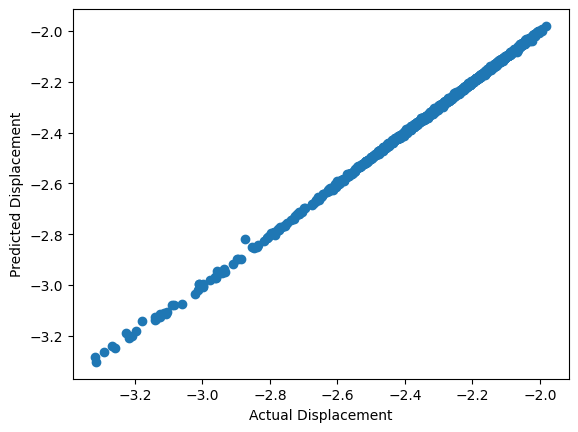

In [30]:
yD_pred_test = pipeD.predict(XD_test)
plt.scatter (yD_test, yD_pred_test)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, yD_pred_test)
print(f'R-squared: {r2:.2f}')
mse = mean_squared_error(yD_test, yD_pred_test)
print(f'Mean Squared Error: {mse:.2f}')

## Mass

In [31]:
mass_data = all_data.drop(columns=['Displacement4', 'Stress4'])
mass_data

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Mass3
0,19.91868,33.22566,40.69056,35.22798,16.94894,24.05912,31.23588,93.38
1,22.88962,23.19807,44.83895,56.28082,12.26751,17.76598,29.86856,82.86
2,55.95612,39.33677,42.01864,47.40645,10.56435,18.35673,17.14532,75.54
3,26.00999,30.22451,44.61681,50.36019,12.88949,16.78163,30.71649,84.62
4,28.13147,42.88168,31.00824,30.83574,11.02044,14.81101,32.82180,93.57
...,...,...,...,...,...,...,...,...
5000,64.84000,38.63300,32.65500,40.40800,13.36300,14.92800,17.55100,77.29
5001,49.04700,37.68800,49.81700,41.18000,10.43700,15.37500,20.17000,79.12
5002,56.64500,52.97300,40.19400,30.47200,11.16100,11.77600,25.68400,79.54
5003,36.84500,36.26600,42.68100,45.95900,10.23000,25.63500,20.09800,83.52


In [33]:
XM = mass_data[['cut 3', 'cut 2', 'cut 1', 'diamond', 'Cut2_to_Top', 'Cut2_to_Cut3', 'Cut1_to_Diamond']]  # multiple features
yM= mass_data['Mass3']
XM

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond
0,19.91868,33.22566,40.69056,35.22798,16.94894,24.05912,31.23588
1,22.88962,23.19807,44.83895,56.28082,12.26751,17.76598,29.86856
2,55.95612,39.33677,42.01864,47.40645,10.56435,18.35673,17.14532
3,26.00999,30.22451,44.61681,50.36019,12.88949,16.78163,30.71649
4,28.13147,42.88168,31.00824,30.83574,11.02044,14.81101,32.82180
...,...,...,...,...,...,...,...
5000,64.84000,38.63300,32.65500,40.40800,13.36300,14.92800,17.55100
5001,49.04700,37.68800,49.81700,41.18000,10.43700,15.37500,20.17000
5002,56.64500,52.97300,40.19400,30.47200,11.16100,11.77600,25.68400
5003,36.84500,36.26600,42.68100,45.95900,10.23000,25.63500,20.09800


In [34]:
# creating train and test sets 
XM_train, XM_test, yM_train, yM_test = train_test_split(XM, yM, test_size=0.3, random_state=4294967295) 
XM_train

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond
1665,47.59481,42.25206,34.06101,46.17642,10.75697,11.89647,32.32867
3298,40.34447,23.19583,32.08891,58.72902,10.55988,19.45837,18.21260
1159,43.11458,42.00108,33.33324,40.82891,11.92666,10.74130,26.45338
2427,48.72993,25.74689,41.04860,33.47625,11.37884,13.82649,33.79261
2815,24.33119,61.02993,28.60044,32.71870,10.23758,23.25642,22.75698
...,...,...,...,...,...,...,...
4310,30.32000,27.78400,32.62000,56.53400,12.39000,15.37500,33.92200
3143,32.14887,23.55357,44.82910,35.95191,16.27150,19.53169,26.71728
3084,38.20147,37.76489,43.31956,41.12856,18.06309,12.05974,27.45187
290,26.60321,33.91355,27.06421,61.18092,12.99191,16.56745,27.98970


In [39]:
pipeM = Pipeline([('polyfeatures', PolynomialFeatures(degree=4)), ('linear', LinearRegression())])
cross_val_score(pipeM, XM_train, yM_train, cv=10)

array([0.99999956, 0.99999964, 0.99999964, 0.99999967, 0.99999962,
       0.99999955, 0.99999969, 0.99999961, 0.99999972, 0.99999967])

In [40]:
pipeM.fit(XM_train, yM_train)

Pipeline(steps=[('polyfeatures', PolynomialFeatures(degree=4)),
                ('linear', LinearRegression())])

R-squared: 1.00
Mean Squared Error: 0.00


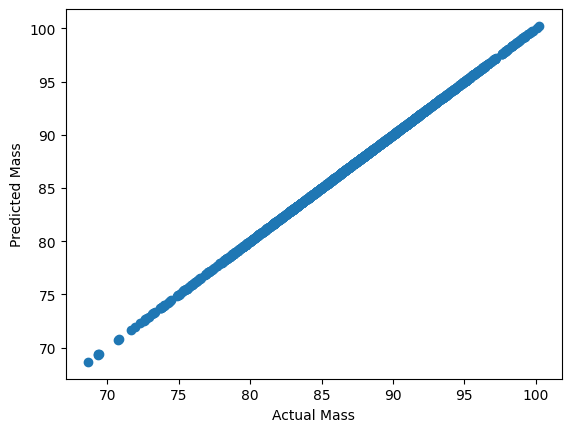

In [41]:
yM_pred_test = pipeM.predict(XM_test)
plt.scatter (yM_test, yM_pred_test)
plt.xlabel("Actual Mass")
plt.ylabel("Predicted Mass")
r2 = r2_score(yM_test, yM_pred_test)
print(f'R-squared: {r2:.2f}')
mse = mean_squared_error(yM_test, yM_pred_test)
print(f'Mean Squared Error: {mse:.2f}')

## SHAP testing displacement

In [32]:
import shap

c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
shap.initjs()

In [34]:
# Create a SHAP explainer for the model
explainer = shap.Explainer(pipeD.predict, XD_train)

# Calculate SHAP values for the model
shap_values = explainer(XD_train)

shap.force_plot(shap_values[0, :], XD_test.iloc[0, :])

ExactExplainer explainer: 3225it [01:33, 31.65it/s]                          


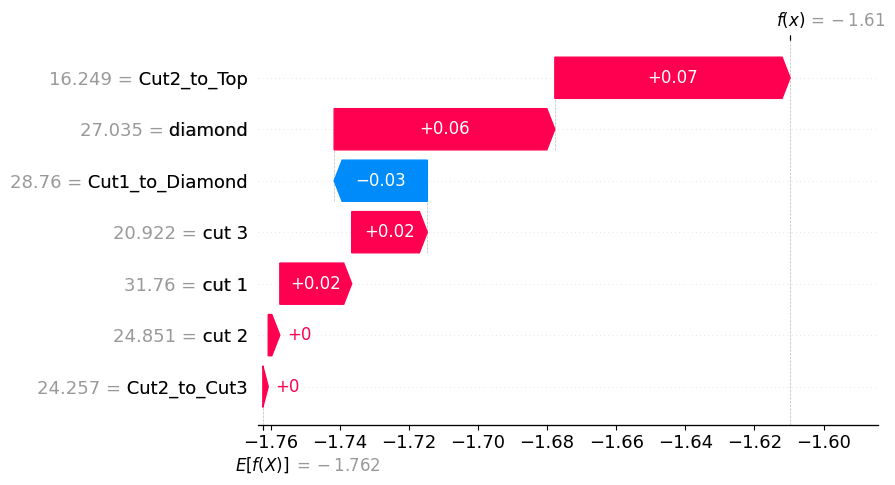

In [35]:
shap.plots.waterfall(shap_values[0, :], max_display=14)

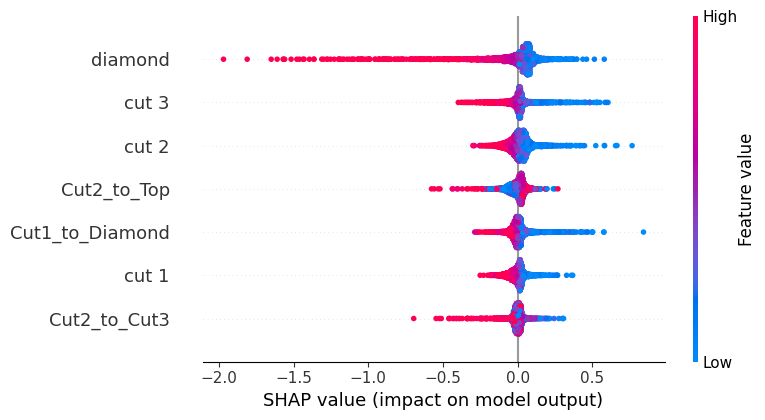

In [37]:
shap.summary_plot(shap_values, XD_train)

## SHAP Testing Mass

In [39]:
# Create a SHAP explainer for the model
explainerM = shap.Explainer(pipeM.predict, XM_train)

# Calculate SHAP values for the model
shap_values_M = explainerM(XM_train)

shap.force_plot(shap_values_M[0, :], XM_test.iloc[0, :])

ExactExplainer explainer: 3225it [01:49, 26.68it/s]                          


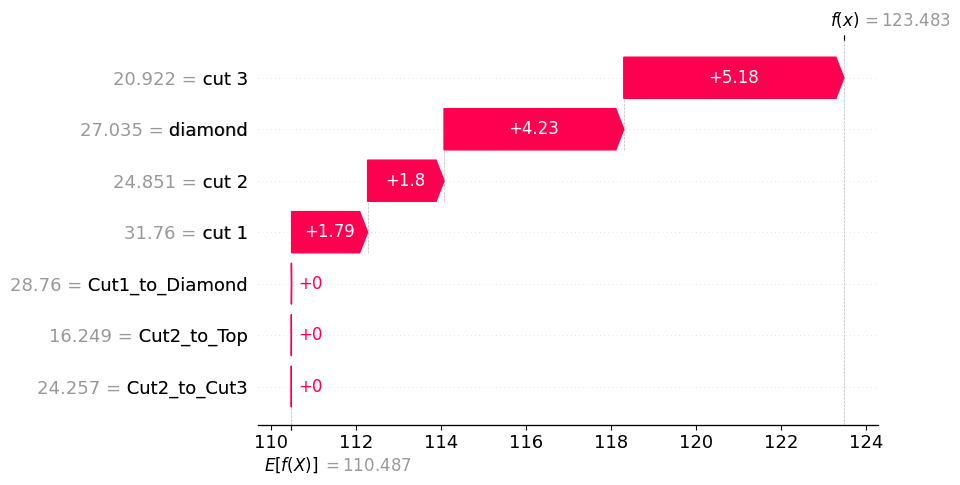

In [42]:
shap.plots.waterfall(shap_values_M[0, :], max_display=14)

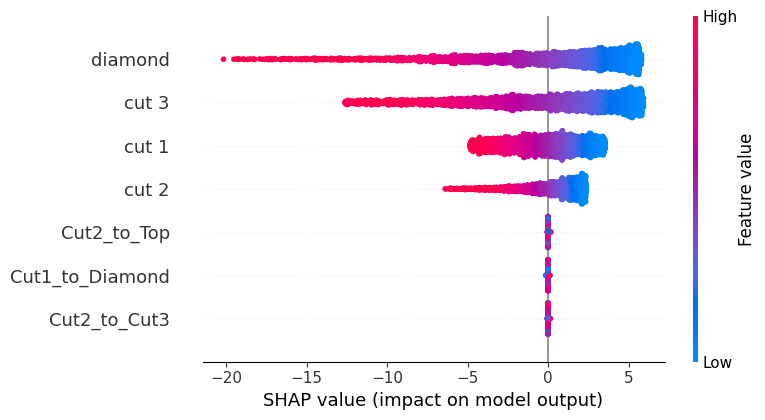

In [43]:
shap.summary_plot(shap_values_M, XM_train)

## Genetic Algorithm

In [55]:
def F1 (GA_data1):
    df1 = pd.DataFrame(data = [GA_data1], columns = ['cut 3', 'cut 2', 'cut 1', 'diamond', 'Cut2_to_Top', 'Cut2_to_Cut3', 'Cut1_to_Diamond'])
    DispPred = pipeD.predict(df1)
    return DispPred

def F2 (GA_data2):
    df2 = pd.DataFrame(data = [GA_data2], columns = ['cut 3', 'cut 2', 'cut 1', 'diamond', 'Cut2_to_Top', 'Cut2_to_Cut3', 'Cut1_to_Diamond'])
    MassPred = pipeM.predict(df2)
    return MassPred



In [ ]:
array([64.99905503, 57.87259235, 47.31596504, 52.4704546 , 10.55587252,
       10.1355103 , 15.00365321])

In [84]:
n = np.array([64.99905503, 57.87259235, 47.31596504, 52.4704546 , 10.55587252,
       10.1355103 , 15.00365321])
F1(n)

array([-2.8316897])

In [44]:
import numpy as np

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter


class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=7,
                         n_obj=2,
                         n_ieq_constr=4,
                         xl=np.array([17.25, 22.5, 24.75, 22.5, 10, 10, 15]),
                         xu=np.array([65, 75, 50, 65, 20, 30, 35]))

    def _evaluate(self, x, out, *args, **kwargs):   
        f1 = 0 - (F1(x))
        f2 = F2(x)

        #g1 = (x[:, 4] + x[:, 1]*0.46929) - 30
        #g2 = 50 - (x[:, 6] + x[:, 2])
        #g3 = 84 - (x[:, 5]*2.4 + x[:, 4]*2.1 + x[:, 0]*0.9)
        #g4 = (x[:, 1] + x[:, 0]*0.904 + (x[:, 3]-22.5)*1.394 + (x[:, 6]-15)*2.144 + (x[:, 2]-24.75)*0.884 + 19.06) - 150
        g1 = (x[4] + x[1]*0.31) - 30 #30
        g2 = 50 - (x[6] + x[2]) #50
        g3 = 84 - (x[5]*2.4 + x[4]*2.1 + x[0]*0.9) #84
        g4 = ((x[1]-22.5)*0.662 + (x[0]-17.25)*0.906 + (x[5]-10)*2.354 + (x[4]-10)*2.132 + (x[3]-22.5)*1.394 + (x[6]-15)*2.144 + (x[2]-24.75)*0.884 + 19.82) - 150 #150
        
        #out["F"] = np.column_stack([f1, f2])
        #out["G"] = np.column_stack([g1, g2, g3, g4])
        out["F"] = ([f1, f2])
        out["G"] = ([g1, g2, g3, g4])

c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-02 11:03:43,005	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [62]:
problem = MyProblem()

algorithm = NSGA2(pop_size=300)

res = minimize(problem, algorithm, ("n_gen", 400), verbose=True, save_history=True, seed=1,)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      300 |     15 |  0.000000E+00 |  1.953897E+01 |             - |             -
     2 |      600 |     22 |  0.000000E+00 |  1.2843021656 |  0.0062353261 |         ideal
     3 |      900 |     29 |  0.000000E+00 |  0.000000E+00 |  0.0046987152 |         ideal
     4 |     1200 |     36 |  0.000000E+00 |  0.000000E+00 |  0.0110670215 |             f
     5 |     1500 |     40 |  0.000000E+00 |  0.000000E+00 |  0.0485598739 |         ideal
     6 |     1800 |     46 |  0.000000E+00 |  0.000000E+00 |  0.0086591679 |             f
     7 |     2100 |     60 |  0.000000E+00 |  0.000000E+00 |  0.0061199516 |             f
     8 |     2400 |     68 |  0.000000E+00 |  0.000000E+00 |  0.0070661316 |         ideal
     9 |     2700 |     76 |  0.000000E+00 |  0.000000E+00 |  0.0035059383 |             f
    10 |     3000 |     90 |  0.000000E+00 |  0.000000E+00 |  0.0104937648 |         ideal

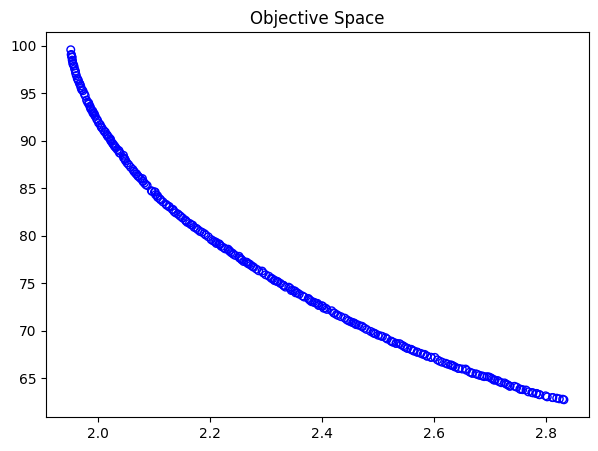

In [75]:
F = res.F
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

In [76]:
fl = F.min(axis=0)
fu = F.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [1.9516923241621633, 2.8316897029890917]
Scale f2: [62.7261596493653, 99.55976369066981]


In [77]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)

Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


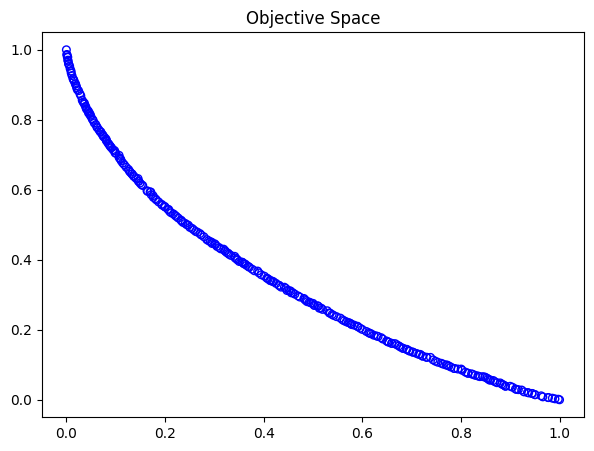

In [78]:
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

In [79]:
weights = np.array([0.001, 0.999])
from pymoo.decomposition.asf import ASF

decomp = ASF()
i = decomp.do(nF, 1/weights).argmin()

Best regarding ASF: Point 
i = 1
F = [ 2.8316897  62.72615965]


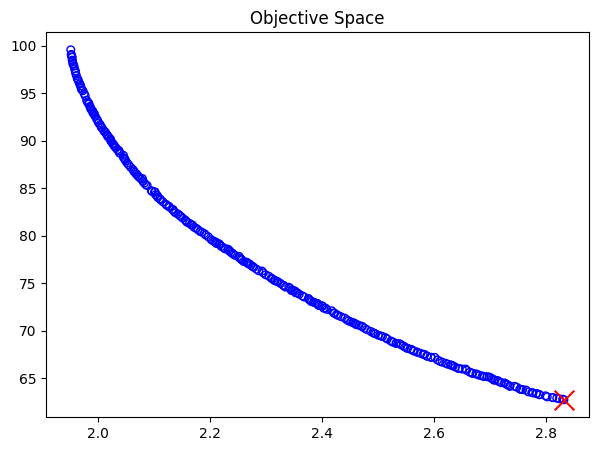

In [80]:
print("Best regarding ASF: Point \ni = %s\nF = %s" % (i, F[i]))

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()

In [81]:
res.X[i]

array([64.99905503, 57.87259235, 47.31596504, 52.4704546 , 10.55587252,
       10.1355103 , 15.00365321])

In [82]:
hist = res.history
n_evals = []             # corresponding number of function evaluations\
hist_F = []              # the objective space values in each generation
hist_cv = []             # constraint violation in each generation
hist_cv_avg = []         # average constraint violation in the whole population

for algo in hist:

    # store the number of function evaluations
    n_evals.append(algo.evaluator.n_eval)

    # retrieve the optimum from the algorithm
    opt = algo.opt

    # store the least contraint violation and the average in each population
    hist_cv.append(opt.get("CV").min())
    hist_cv_avg.append(algo.pop.get("CV").mean())

    # filter out only the feasible and append and objective space values
    feas = np.where(opt.get("feasible"))[0]
    hist_F.append(opt.get("F")[feas])

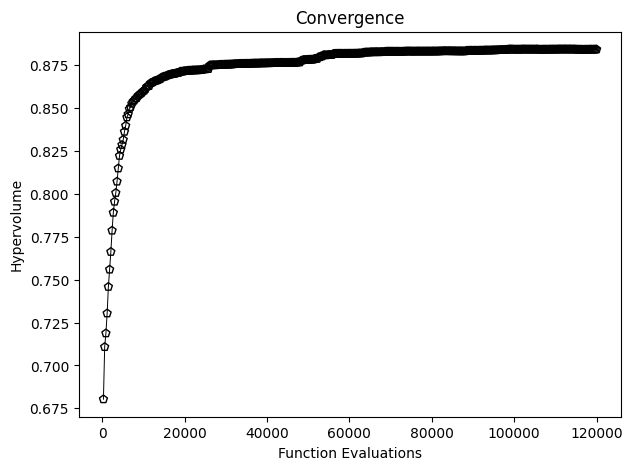

In [83]:
from pymoo.indicators.hv import Hypervolume

metric = Hypervolume(ref_point= np.array([1.1, 1.1]),
                     norm_ref_point=False,
                     zero_to_one=True,
                     ideal=approx_ideal,
                     nadir=approx_nadir)

hv = [metric.do(_F) for _F in hist_F]

plt.figure(figsize=(7, 5))
plt.plot(n_evals, hv,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, hv,  facecolor="none", edgecolor='black', marker="p")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("Hypervolume")
plt.show()